In [71]:
from qiskit import *

qr = QuantumRegister(8)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr,cr)

# state(t=0) = ket 00001
circuit.x(qr[2])

In [72]:

def one_step(qubits):
    circuit.h(qr[7])

    for qubit in qubits:
        circuit.cx(qr[7],qr[qubit])


    circuit.toffoli(qr[0], qr[1],qr[3])
    circuit.toffoli(qr[2], qr[3],qr[5])
    circuit.toffoli(qr[4], qr[5],qr[6])

    circuit.toffoli(qr[2], qr[3],qr[5])
    circuit.toffoli(qr[2], qr[3],qr[4])
    circuit.toffoli(qr[0], qr[1],qr[3])
    circuit.toffoli(qr[0], qr[1],qr[2])

    circuit.cx(qr[0], qr[1])
    circuit.x(qr[0])

    for qubit in qubits:
        circuit.cx(qr[7],qr[qubit])


qubits = [0,1,2,4,6]
steps = 1
for i in range(steps):
    one_step(qubits)

# circuit.draw(output='mpl')

In [73]:
circuit.measure([qr[0],qr[1],qr[2],qr[4],qr[6]],cr)
# circuit.draw(output='mpl')

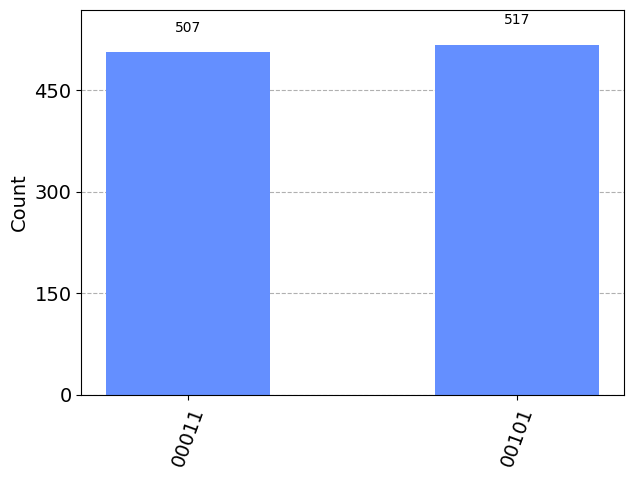

In [74]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))